In [1]:
!pip install missingno

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import missingno as msno
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family ='Malgun Gothic')

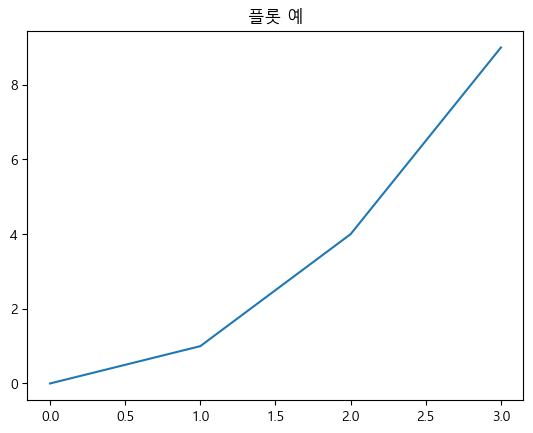

In [3]:
plt.title('플롯 예')
plt.plot([0,1,4,9])
plt.show()

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('C:/workspace/Test_Data/netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [6]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


<Axes: >

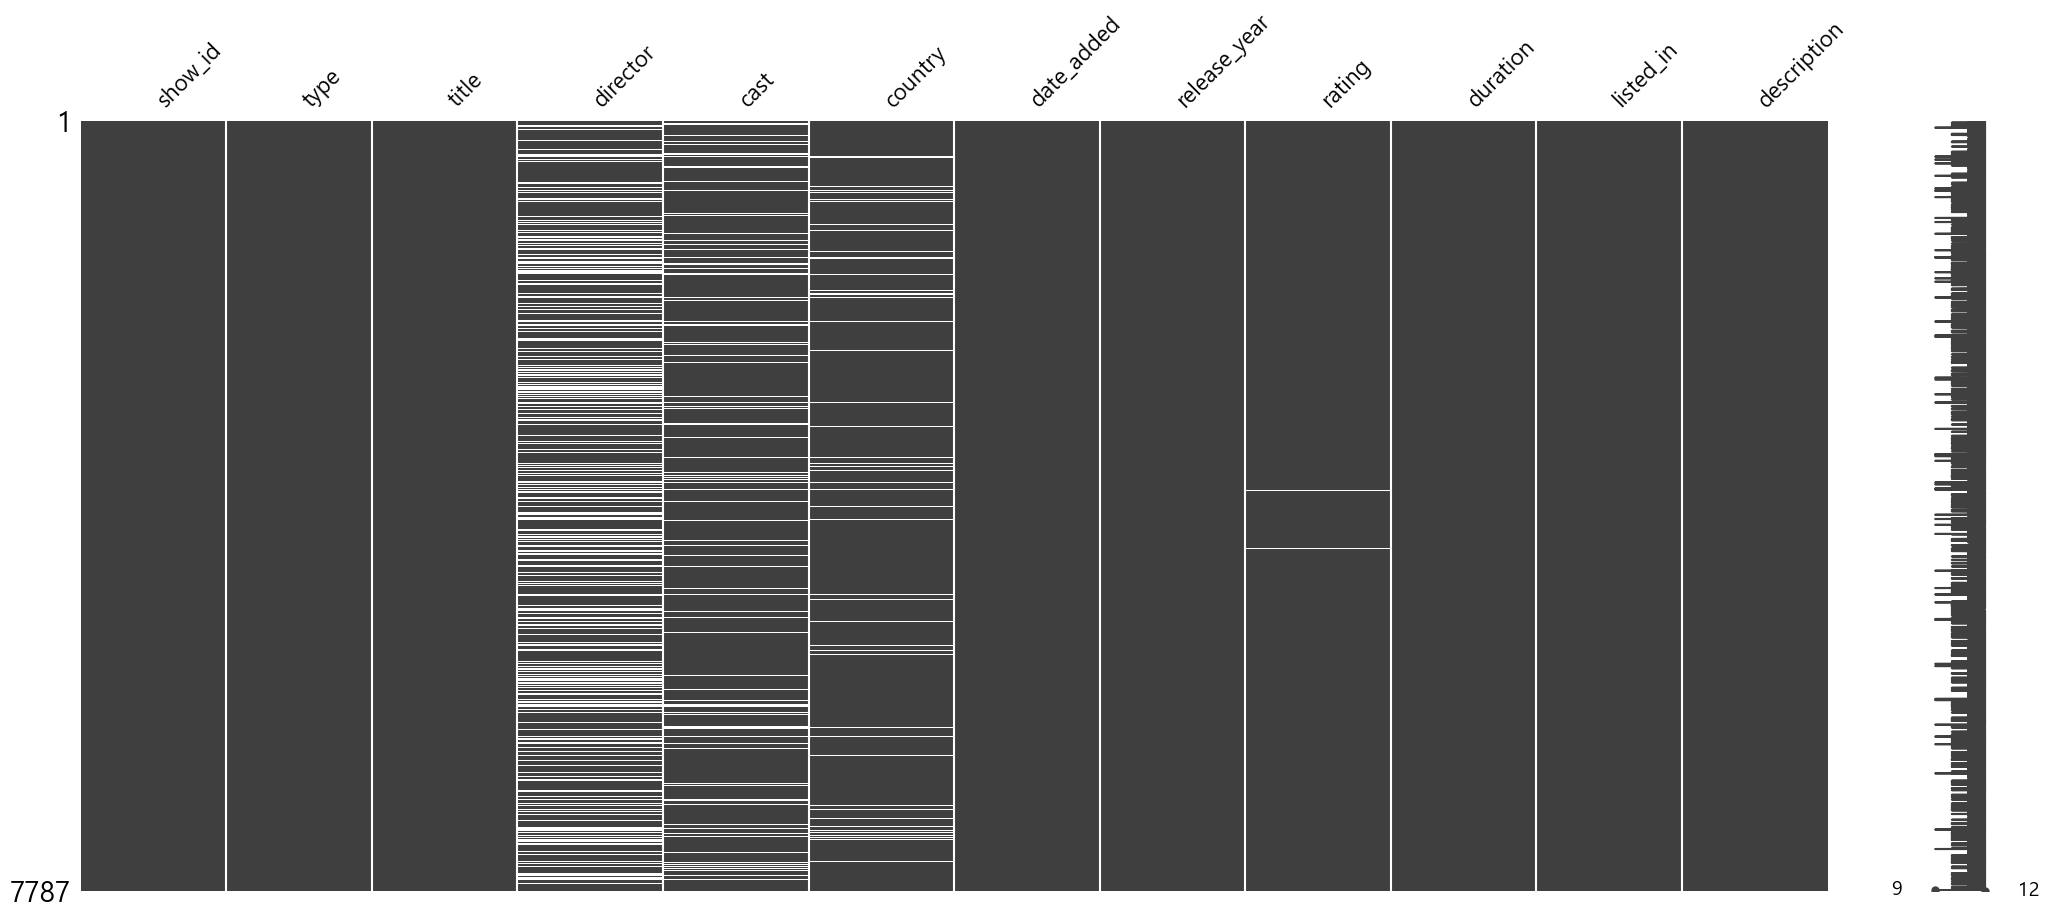

In [7]:
msno.matrix(df)
#msno.matrix(df.sample(500))

<Axes: >

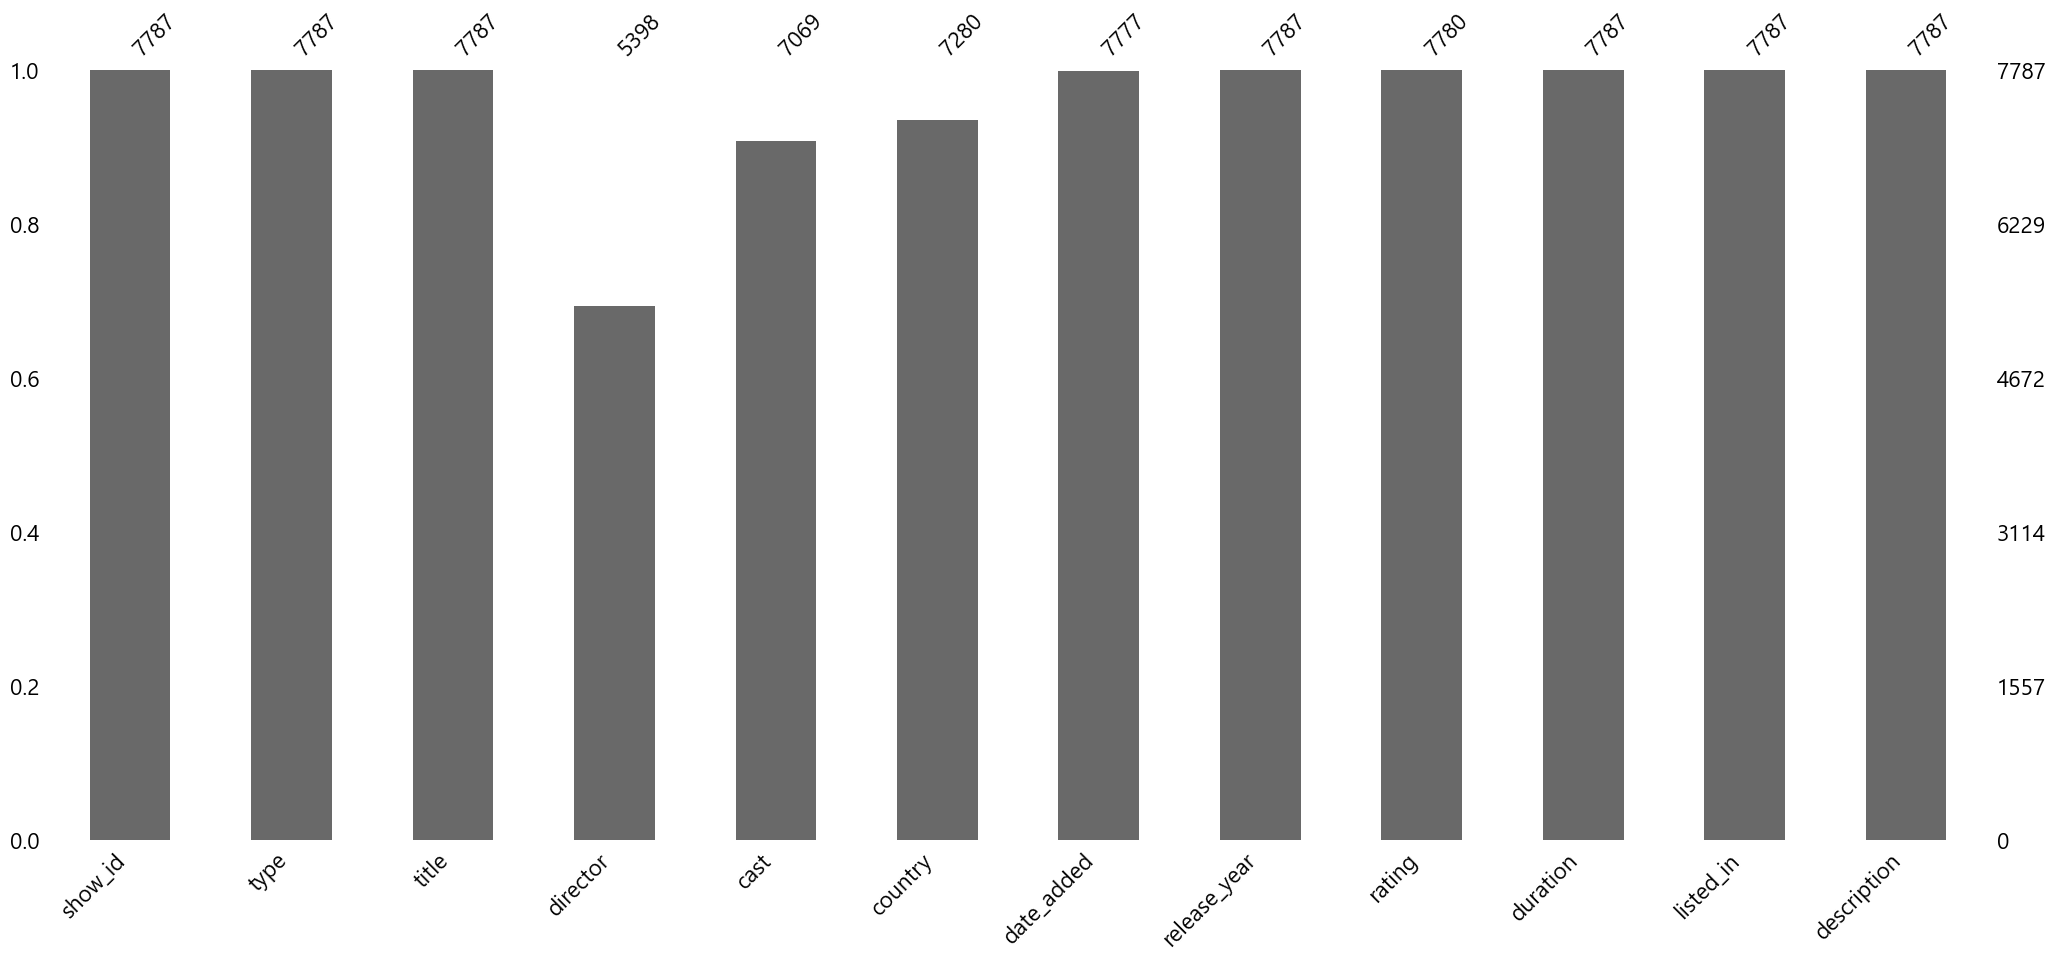

In [8]:
msno.bar(df)

In [9]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
# nan 을 최빈값으로 대체
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['country']

0                                                  Brazil
1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
                              ...                        
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                        United States
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, Length: 7787, dtype: object

In [11]:
df['country'].value_counts()

country
United States                                                   3062
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 681, dtype: int64

In [12]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country            0
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [13]:
df['cast'].replace(np.nan, 'Missing', inplace = True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [14]:
df['director'].replace(np.nan , 'Missing',inplace =True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,Missing,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,Missing,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [15]:
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [16]:
# nan 값을 없애기
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

In [17]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [18]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [19]:
# 주피터 datetime -> format ='mixed' 입력
df['date_added'] = pd.to_datetime(df['date_added'], format ='mixed')
df['date_added']

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7770, dtype: datetime64[ns]

In [20]:
date_str = ['2023-09-12','2023.9.13',' 2023.9.14','9/14/2023']
pd.to_datetime(date_str, format ='mixed')

DatetimeIndex(['2023-09-12', '2023-09-13', '2023-09-14', '2023-09-14'], dtype='datetime64[ns]', freq=None)

In [21]:
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [22]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,November,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,January,2020


In [23]:
np.__version__

'1.26.1'

In [24]:
sns.__version__

'0.13.0'

In [25]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,10,October,2020
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3,March,2019
7784,s7785,Movie,Zulu Man in Japan,Missing,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",9,September,2020
7785,s7786,TV Show,Zumbo's Just Desserts,Missing,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,10,October,2020
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Missing,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,3,March,2020


In [26]:
df['country_1st'] = df['country'].apply(lambda x : x.split(',')[0])
df['country_1st'].tail()

7782            Sweden
7783             India
7784     United States
7785         Australia
7786    United Kingdom
Name: country_1st, dtype: object

In [27]:
df['country_1st'].replace('United States', 'USA', inplace = True)
df['country_1st'].replace('United Kingdom', 'UK', inplace = True)
df['country_1st'].replace('South korea', 'S.Korea', inplace = True)
df['country_1st'].tail()

7782       Sweden
7783        India
7784          USA
7785    Australia
7786           UK
Name: country_1st, dtype: object

In [28]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [29]:
# 데이터 =>  https://www.kaggle.com/code/andreshg/eda-beginner-to-expert-plotly

In [30]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [31]:
df['target_user'] = df['rating'].replace(ratings_ages)
df['target_user'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [32]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,country_1st,target_user
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,10,October,2020,Sweden,Adults
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3,March,2019,India,Teens
7784,s7785,Movie,Zulu Man in Japan,Missing,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",9,September,2020,USA,Adults
7785,s7786,TV Show,Zumbo's Just Desserts,Missing,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,10,October,2020,Australia,Older Kids
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Missing,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,3,March,2020,UK,Adults


In [33]:
df['duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '113 min', '114 min', '130 min',
       '94 min', '140 min', '135 min', '82 min', '70 min', '121 min',
       '92 min', '164 min', '53 min', '83 min', '116 min', '86 min',
       '120 min', '96 min', '126 min', '129 min', '77 min', '137 min',
       '148 min', '28 min', '122 min', '176 min', '85 min', '22 min',
       '68 min', '111 min', '29 min', '142 min', '168 min', '21 min',
       '59 min', '20 min', '98 min', '108 min', '76 min', '26 min',
       '156 min', '30 min', '57 min', '150 min', '133 min', '115 min',
       '

In [34]:
df['season_count'] = df.apply(lambda x : x['duration'].split(' ')[0] if 'Season' in x['duration'] else '', axis = 1)
df['season_count'].unique()


array(['4', '', '1', '2', '3', '5', '9', '8', '6', '11', '7', '13', '12',
       '10', '16', '15'], dtype=object)

In [35]:
df['season_count'].replace('', np.nan, inplace = True)
df['season_count'].unique()

array(['4', nan, '1', '2', '3', '5', '9', '8', '6', '11', '7', '13', '12',
       '10', '16', '15'], dtype=object)

In [36]:
df['duration'] = df.apply(lambda x : x['duration'].split(' ')[0] if 'Season' not in x['duration'] else np.nan , axis = 1)

In [37]:
df = df.drop(columns =['show_id','description'])
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added,country_1st,target_user,season_count
0,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,NaN,"International TV Shows, TV Dramas, TV Sci-Fi &...",8,August,2020,Brazil,Adults,4
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",12,December,2016,Mexico,Adults,NaN
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies",12,December,2018,Singapore,Adults,NaN
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",11,November,2017,USA,Teens,NaN
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,1,January,2020,USA,Teens,NaN


In [38]:
df['year_added'].unique()

array([2020, 2016, 2018, 2017, 2019, 2021, 2015, 2013, 2011, 2012, 2014,
       2008, 2009, 2010])

In [39]:
df['type']= pd.Categorical(df['type'])
df.dtypes

type                      category
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
month_added                  int32
month_name_added            object
year_added                   int32
country_1st                 object
target_user                 object
season_count                object
dtype: object

In [40]:
df['target_user']= pd.Categorical(df['target_user'])
df.dtypes

type                      category
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
month_added                  int32
month_name_added            object
year_added                   int32
country_1st                 object
target_user               category
season_count                object
dtype: object

In [41]:
df['year_added']= pd.to_numeric(df['year_added'])
df.dtypes

type                      category
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
month_added                  int32
month_name_added            object
year_added                   int32
country_1st                 object
target_user               category
season_count                object
dtype: object

In [42]:
df['duration']= pd.to_numeric(df['duration'])
df.dtypes

type                      category
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                   float64
listed_in                   object
month_added                  int32
month_name_added            object
year_added                   int32
country_1st                 object
target_user               category
season_count                object
dtype: object

In [43]:
df['season_count']= pd.to_numeric(df['season_count'])
df.dtypes

type                      category
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                   float64
listed_in                   object
month_added                  int32
month_name_added            object
year_added                   int32
country_1st                 object
target_user               category
season_count               float64
dtype: object

In [44]:
df_tv = df[df['type'] == 'TV Show']
df_movie = df[df['type'] == 'Movie']

In [45]:
df_movie.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added,country_1st,target_user,season_count
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93.0,"Dramas, International Movies",12,December,2016,Mexico,Adults,NaN
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78.0,"Horror Movies, International Movies",12,December,2018,Singapore,Adults,NaN


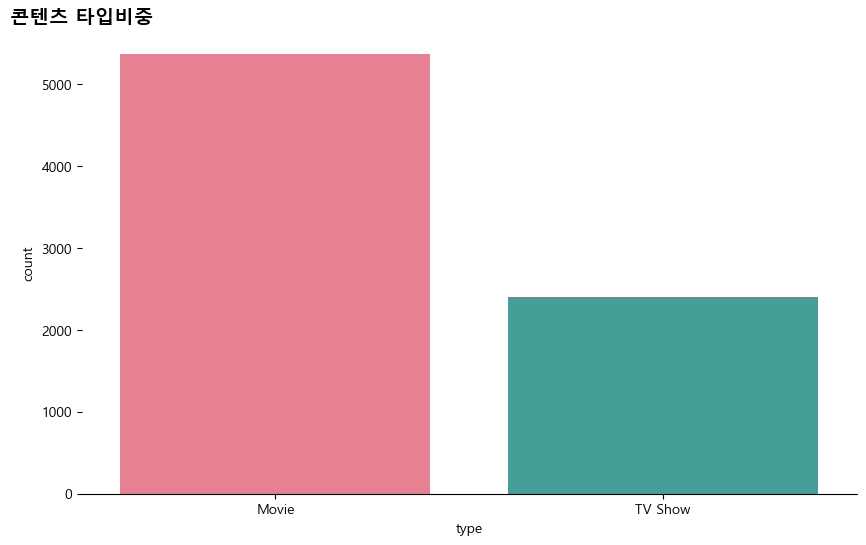

In [46]:
plt.figure(figsize =(10,6))
sns.countplot(x='type',data = df, palette = 'husl')
sns.despine(left = True)
plt.title('콘텐츠 타입비중', fontsize =14, fontweight='bold', position=(0,0))
plt.show()

In [47]:
type_count = df.groupby(['type'])['type'].count()
length = len(df)
result = (type_count / length ).round(2)
result

type
Movie      0.69
TV Show    0.31
Name: type, dtype: float64

In [48]:
type_ration = pd.DataFrame(result).T
type_ration

type,Movie,TV Show
type,0.69,0.31


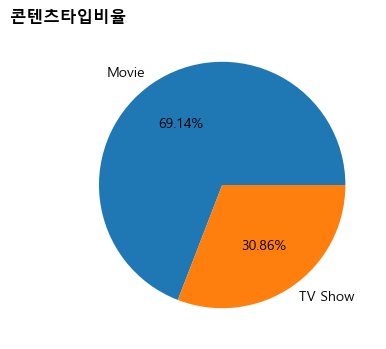

In [49]:
labels =['Movie','TV Show']
plt.figure(figsize =(6,4))
plt.pie(type_count / length, labels = labels, autopct = '%1.2f%%', textprops={'fontsize':10})
plt.title('콘텐츠타입비율', fontweight ='bold', position =(0,0))
plt.show()

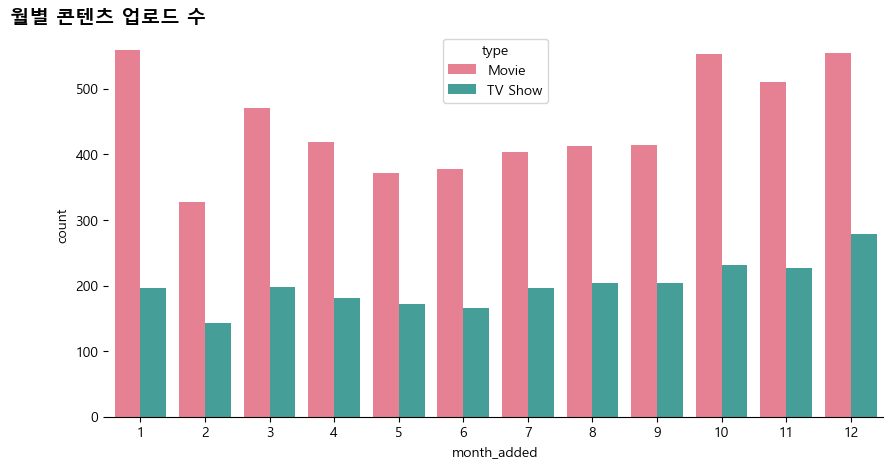

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(x ='month_added', hue = 'type', data = df, palette = 'husl')
sns.despine(left = True)
plt.title('월별 콘텐츠 업로드 수',fontsize = 14, fontweight='bold', position =(0,0))
plt.show()

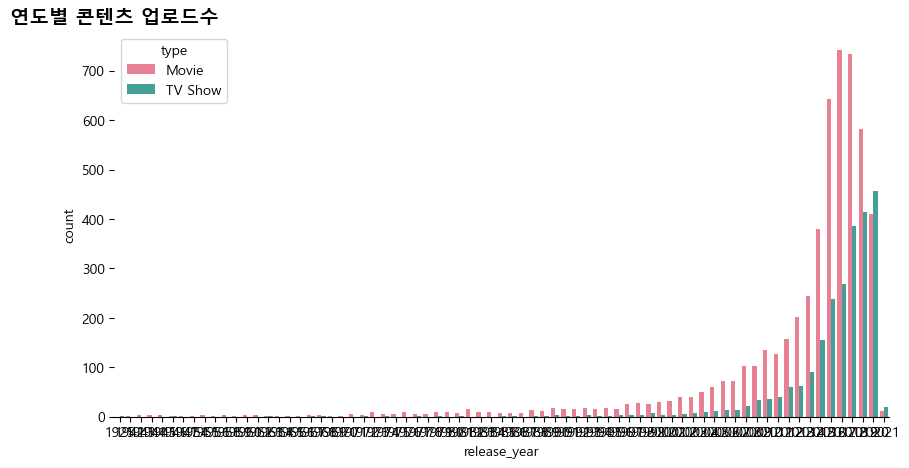

In [56]:
# release_year와 type을 연도순으로 hue =type
plt.figure(figsize =(10,5))
sns.countplot( x='release_year', hue = 'type', data =df, palette ='husl')
sns.despine(left=True)
plt.title('연도별 콘텐츠 업로드수', fontweight = 'bold', fontsize = 14, position =(0,0))
plt.show()

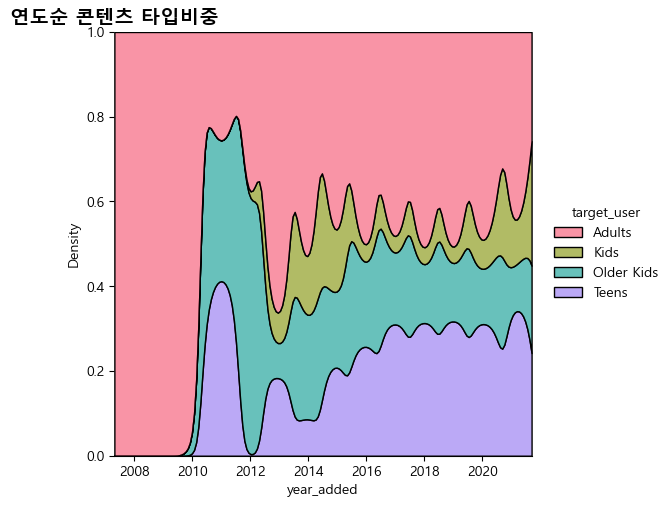

In [57]:
sns.displot(x='year_added', hue='target_user', data = df, kind ='kde', palette = 'husl', multiple= 'fill', clip=(0,None))
sns.despine(left = True)
plt.title('연도순 콘텐츠 타입비중', fontweight = 'bold', fontsize = 14, position =(0,0))
plt.show()


In [58]:
df['listed_in'].value_counts()

listed_in
Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: count, Length: 491, dtype: 

In [60]:
# df_movie['listed_in'].value_counts().head(10)
movie_top10 = df_movie['listed_in'].value_counts()[:10]
movie_top10

listed_in
Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Dramas, International Movies, Romantic Movies       153
Name: count, dtype: int64

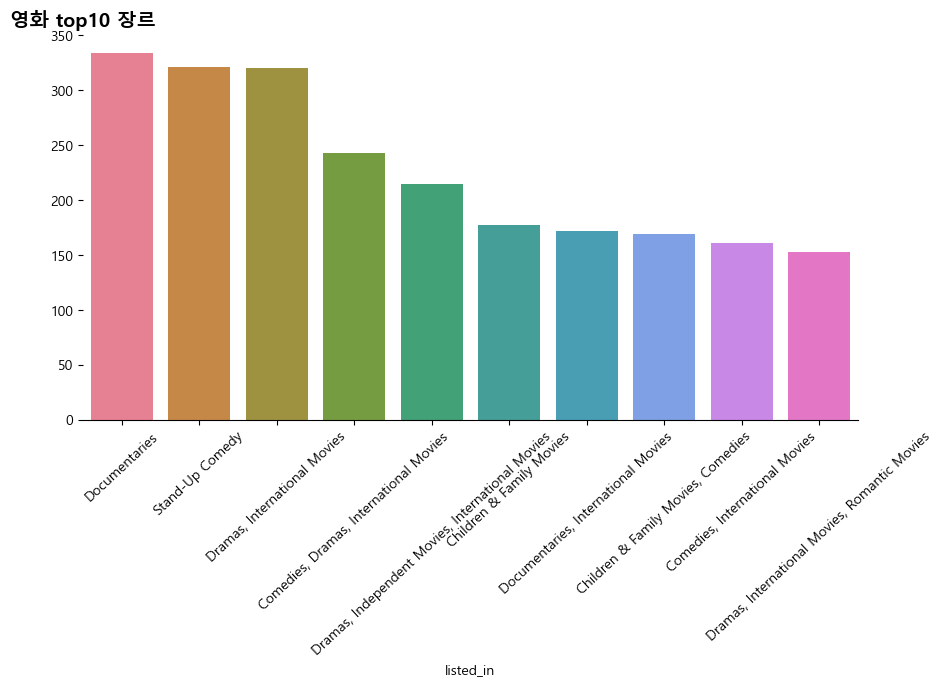

In [64]:
plt.figure(figsize =(10,5))
sns.barplot(x =movie_top10.index, y =movie_top10.values, palette = 'husl')
sns.despine(left = True)
plt.title('영화 top10 장르', fontweight = 'bold', fontsize = 14, position =(0,0))
plt.xticks(rotation = 43)
plt.show()

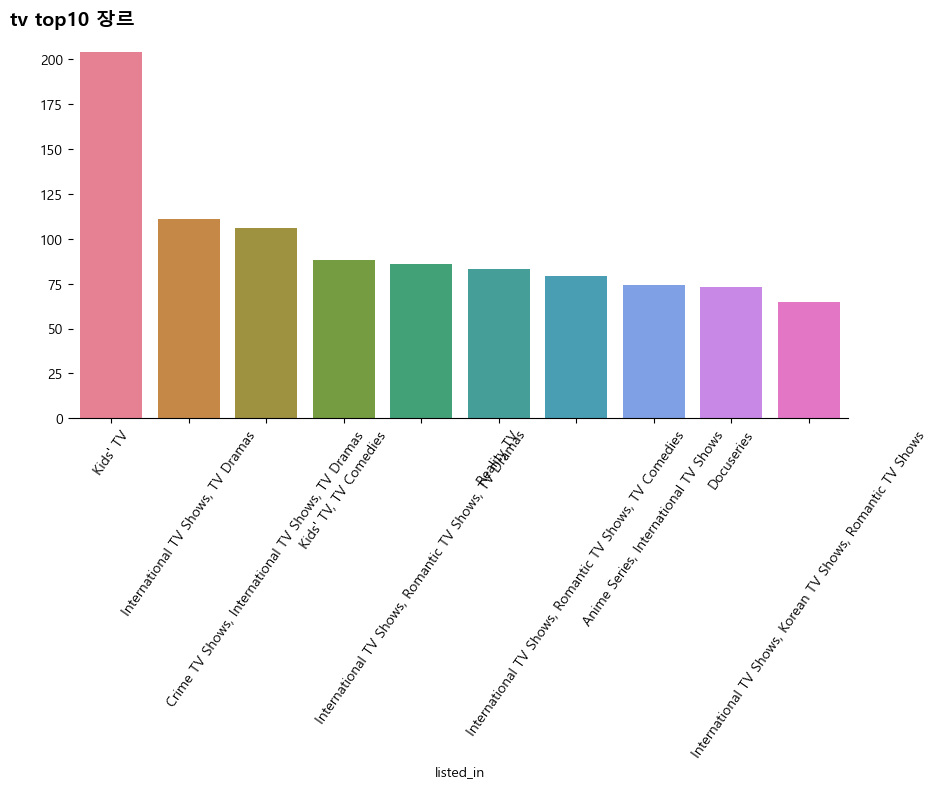

In [67]:
tv_top10 = df_tv['listed_in'].value_counts()[:10]
plt.figure(figsize =(10,5))
sns.barplot(x =tv_top10.index, y =tv_top10.values, palette = 'husl')
sns.despine(left = True)
plt.title('tv top10 장르', fontweight = 'bold', fontsize = 14, position =(0,0))
plt.xticks(rotation = 55)
plt.show()

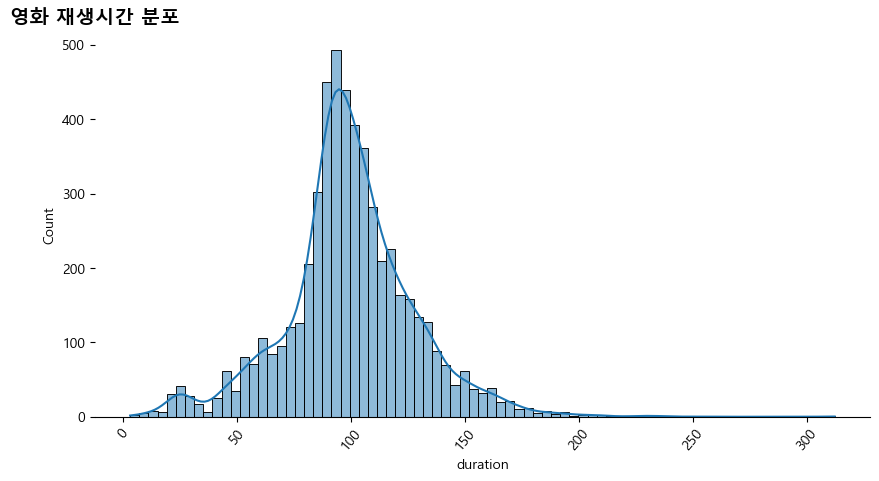

In [73]:
# 영화 재생시간 histplot
df_duration_over0= df[df['duration'] > 0]
plt.figure(figsize =(10,5))
sns.histplot(x='duration',  data = df_duration_over0, kde =True, bins = 30, binwidth =4, discrete = False)
# kernel density estimate
sns.despine(left = True)
plt.title('영화 재생시간 분포', fontsize = 14, fontweight = 'bold', position = (0,0))
plt.xticks(rotation= 50)
plt.show()

In [86]:
#시즌
df_season_count = df['season_count'].value_counts().reset_index()

In [87]:
df_season_count

,season_count,count
0,1.0,1606
1,2.0,378
2,3.0,183
3,4.0,86
4,5.0,57
5,6.0,30
6,7.0,19
7,8.0,18
8,9.0,8
9,10.0,5


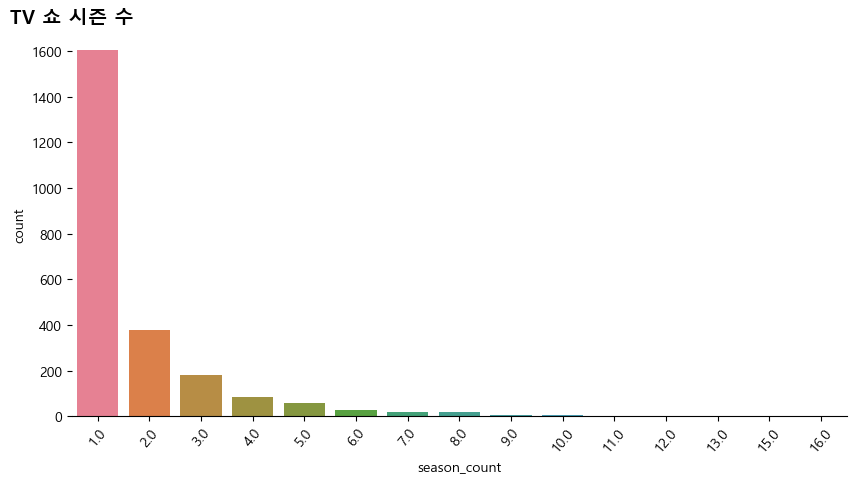

In [91]:
plt.figure(figsize =(10,5))
sns.barplot(x='season_count',  y= 'count', data = df_season_count, palette = 'husl' )
# kernel density estimate
sns.despine(left = True)
plt.title('TV 쇼 시즌 수', fontsize = 14, fontweight = 'bold', position = (0,0))
plt.xticks(rotation= 50)
plt.show()

In [99]:
# 월별 컨텐츠 업로드수 히트맵
# 그룹바이
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December'][::-1]

In [96]:
df.month_name_added.unique()

array(['August', 'December', 'November', 'January', 'July', 'June',
       'April', 'October', 'May', 'March', 'September', 'February'],
      dtype=object)

In [100]:
df_by_month = df.groupby('year_added')['month_name_added'].value_counts().unstack().fillna(0)[month_order].T

In [101]:
df_by_month

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month_name_added,,,,,,,,,,,,,,
December,0.0,0.0,0.0,0.0,1.0,2.0,6.0,23.0,95.0,118.0,190.0,222.0,175.0,0.0
November,0.0,1.0,1.0,0.0,1.0,2.0,5.0,4.0,46.0,88.0,160.0,272.0,158.0,0.0
October,0.0,0.0,0.0,11.0,0.0,3.0,4.0,15.0,52.0,131.0,192.0,204.0,173.0,0.0
September,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,47.0,119.0,127.0,136.0,178.0,0.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,40.0,115.0,169.0,145.0,144.0,0.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,29.0,80.0,157.0,169.0,156.0,0.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,19.0,95.0,78.0,175.0,167.0,0.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,13.0,88.0,101.0,159.0,173.0,0.0
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,22.0,94.0,118.0,171.0,188.0,0.0


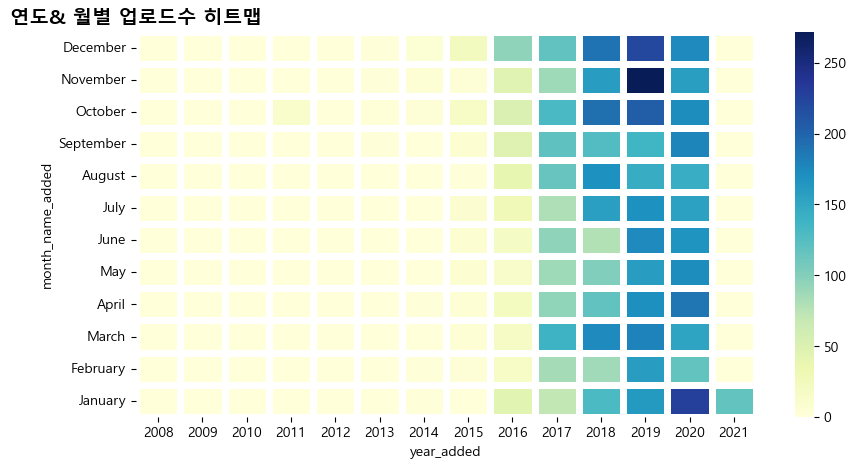

In [102]:
plt.figure(figsize =(10,5))
sns.heatmap(df_by_month, linewidth =5, cmap='YlGnBu')
plt.title('연도& 월별 업로드수 히트맵',fontsize =14, fontweight = 'bold', position=(0,0))
plt.show()

In [103]:
# 제작국가
top10_country = df.groupby('country_1st')['country'].agg('count').sort_values(ascending = False)[:10]
top10_country

country_1st
USA            3379
India           956
UK              576
Canada          259
Japan           235
France          196
South Korea     194
Spain           168
Mexico          123
Turkey          106
Name: country, dtype: int64

In [110]:
colors = ['#f1f1f1' for _ in range(len(top10_country))]
colors[0] = '#E50914'

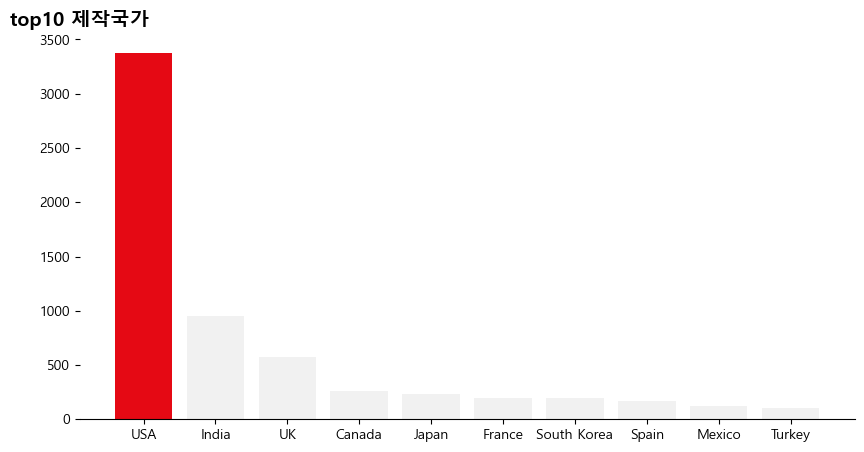

In [111]:
plt.figure(figsize =(10,5))
plt.bar(top10_country.index, top10_country.values, width = 0.8, linewidth = 0.6, color = colors)
plt.title('top10 제작국가',fontsize =14, fontweight = 'bold', position=(0,0))
sns.despine(top = True, right = True, left = True, bottom = False)
plt.show()
